# D06 
Missing Value, Train & Test, 
Pandas missing data is represented by two value:
None: None is a Python singleton object that is often used for missing data in Python code.
NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation
Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :
isnull(), notnull(), dropna(), fillna(), replace(), interpolate()

In [1]:
# Libraries
import pandas as pd
import numpy as np
from pydataset import data

In [25]:
# data
dict1 = {'English': [100, 90, np.nan, 95,100],
        'Maths'   : [30, 45, 56, np.nan, np.nan],
        'Science' : [np.nan, 40, 80, 98,np.nan]}
  
# creating a dataframe from list
df = pd.DataFrame(dict1, index =['S01','S02','S03','S04','S05'])
df  

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


In [26]:
df.describe()

,English,Maths,Science
count,4.000000,3.000000,3.000000
mean,96.250000,43.666667,72.666667
std,4.787136,13.051181,29.687259
min,90.000000,30.000000,40.000000
25%,93.750000,37.500000,60.000000
50%,97.500000,45.000000,80.000000
75%,100.000000,50.500000,89.000000
max,100.000000,56.000000,98.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, S01 to S05
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  4 non-null      float64
 1   Maths    3 non-null      float64
 2   Science  3 non-null      float64
dtypes: float64(3)
memory usage: 332.0+ bytes


## check missing values

In [152]:
df.isnull().any() # is there any missing value in Df

English    True
Maths      True
Science    True
dtype: bool

In [27]:
# using isnull() function  - T & F at each data point
df.isnull()

,English,Maths,Science
S01,False,False,True
S02,False,False,False
S03,True,False,False
S04,False,True,False
S05,False,True,True


In [41]:
print("\n Missing in Full Data Frame :", df.isnull().sum().sum())
print("Missing in each column : ",df.isnull().sum(axis=0))
print("\n Missing in each row : ", df.isnull().sum(axis=1))


 Missing in Full Data Frame
  5
Missing in each column
  English    1
Maths      2
Science    2
dtype: int64

 Missing in each row
  S01    1
S02    0
S03    1
S04    1
S05    2
dtype: int64


In [36]:
print('Missing values in Maths column ', pd.isnull(df.Maths).sum())
print('Missing values in Student S02 ', pd.isnull(df.loc['S02']).sum(axis=0))

Missing values in Maths column  2
Missing values in Student S02  0


In [37]:
df

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


## check non-missing values

In [40]:
df.notnull().sum().sum()

10

## Fill Missing Values

In [43]:
df

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


In [44]:
# Fill missing values with previous values  of rows 
df.fillna(method ='pad')
#No previous row for S01, hence Science marks are still NaN

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,90.0,56.0,80.0
S04,95.0,56.0,98.0
S05,100.0,56.0,98.0


In [45]:
# Fill missing values with nex values  of rows 
df.fillna(method ='bfill')
#No next row for S05, hence Maths & Science marks are still NaN 

,English,Maths,Science
S01,100.0,30.0,40.0
S02,90.0,45.0,40.0
S03,95.0,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


In [49]:
df['Science']

S01     NaN
S02    40.0
S03    80.0
S04    98.0
S05     NaN
Name: Science, dtype: float64

In [50]:
# filling a column null values using fillna() 
df["Science"].fillna(99, inplace = False) 
#inplace True will replace values permanently

S01    99.0
S02    40.0
S03    80.0
S04    98.0
S05    99.0
Name: Science, dtype: float64

In [51]:
# replace function
df["Science"].replace(to_replace = np.nan, value = -99) 

S01   -99.0
S02    40.0
S03    80.0
S04    98.0
S05   -99.0
Name: Science, dtype: float64

In [52]:
# replace all null values in DF with -100
df.replace(to_replace = np.nan, value = -100) 

,English,Maths,Science
S01,100.0,30.0,-100.0
S02,90.0,45.0,40.0
S03,-100.0,56.0,80.0
S04,95.0,-100.0,98.0
S05,100.0,-100.0,-100.0


## Interpolate
interpolate the missing values using Linear method. Note that Linear method ignore the index and treat the values as equally spaced.

In [53]:
# to interpolate the missing values 
df.interpolate(method ='linear', limit_direction ='forward')

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,92.5,56.0,80.0
S04,95.0,56.0,98.0
S05,100.0,56.0,98.0


In [54]:
df
# English : S02(90) - S04(95) = 5/2 = 2.25  
# S03 = 90 + 2.25 = 92.5
# other cases = previous value

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


In [55]:
# to interpolate the missing values 
df.interpolate(method ='linear', limit_direction ='backward')

,English,Maths,Science
S01,100.0,30.0,40.0
S02,90.0,45.0,40.0
S03,92.5,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


## Drop Missing values

In [56]:
df.dropna()
# drop rows with at least on NaN value in their row

,English,Maths,Science
S02,90.0,45.0,40.0


In [57]:
df.dropna(how = 'all')   # how = all, any
#drop only those rows which have all row data missing, nil here

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0
S05,100.0,NaN,NaN


In [71]:
df.isna().sum(axis=0)
# 5 rows, Maths & Science have 2 each missing out of 5: hence 3 data points non-missing 

English    1
Maths      2
Science    2
dtype: int64

In [73]:
df.dropna(axis=1, thresh = 4)
# 4 non missing values in Column, then drop that columns
# here Maths and Science 

,English
S01,100.0
S02,90.0
S03,NaN
S04,95.0
S05,100.0


In [80]:
df.notnull().sum(axis=1)

S01    2
S02    3
S03    2
S04    2
S05    1
dtype: int64

In [77]:
# NA on selected columns
df.dropna(subset =['Maths','Science'], thresh=1)
#drop those rows which have 1 non missing value : here it S05

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0


In [129]:
print("% of missing values", df.isna().mean().mean())
# % of mssing values
print("No of Data Points ", df.shape[0] * df.shape[1])
print("No of Missing Values ", df.isna().sum().sum())
print(5/15)

% of missing values 0.3333333333333333
No of Data Points  15
No of Missing Values  5
0.3333333333333333


### Can we say, drop that column or row which have more than 40% values missing

In [82]:
df.shape
# 5 rows, 3 columns

(5, 3)

In [122]:
print('Non Missing in Column ', np.ceil(.7 * 5), ' Non Missing in Row ', np.ceil(.6 *3))

Non Missing in Column  4.0  Non Missing in Row  2.0


In [123]:
df.dropna(axis=1, thresh = np.ceil(.7 * 5))
#keep only those columns which have non-missing values >=4 (70%)

,English
S01,100.0
S02,90.0
S03,NaN
S04,95.0
S05,100.0


In [135]:
#keep only those columns at most 20% missing value or at least 80% non missing values
df.dropna(axis=1, thresh = (1.0 -.2)* df.shape[0])

,English
S01,100.0
S02,90.0
S03,NaN
S04,95.0
S05,100.0


In [137]:
df.dropna(axis=0, thresh = np.round(.7 *3,0))
#drop rows which have at least 2 non-missing values in each row, show all columns

,English,Maths,Science
S01,100.0,30.0,NaN
S02,90.0,45.0,40.0
S03,NaN,56.0,80.0
S04,95.0,NaN,98.0


## additional library
msno

In [139]:
#pip install missingno

In [149]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, S01 to S05
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  4 non-null      float64
 1   Maths    3 non-null      float64
 2   Science  3 non-null      float64
dtypes: float64(3)
memory usage: 332.0+ bytes


<AxesSubplot: >

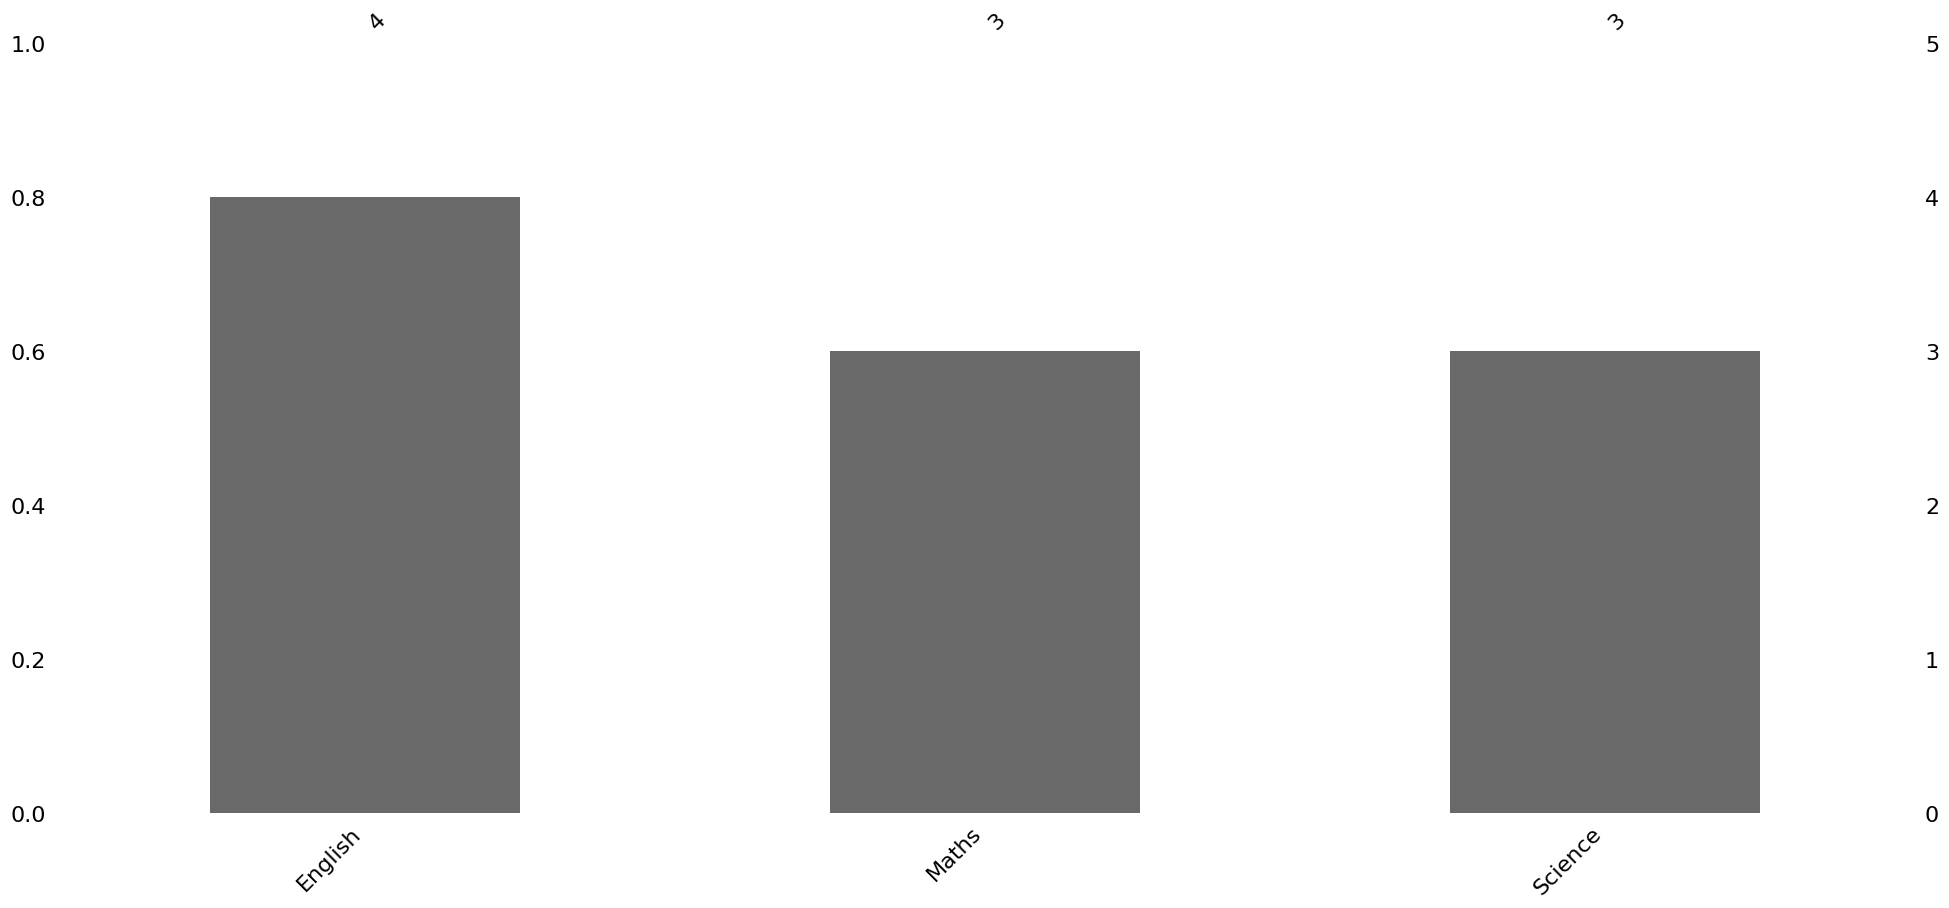

In [143]:
# Gives a bar chart of the missing values
msno.bar(df)

<AxesSubplot: >

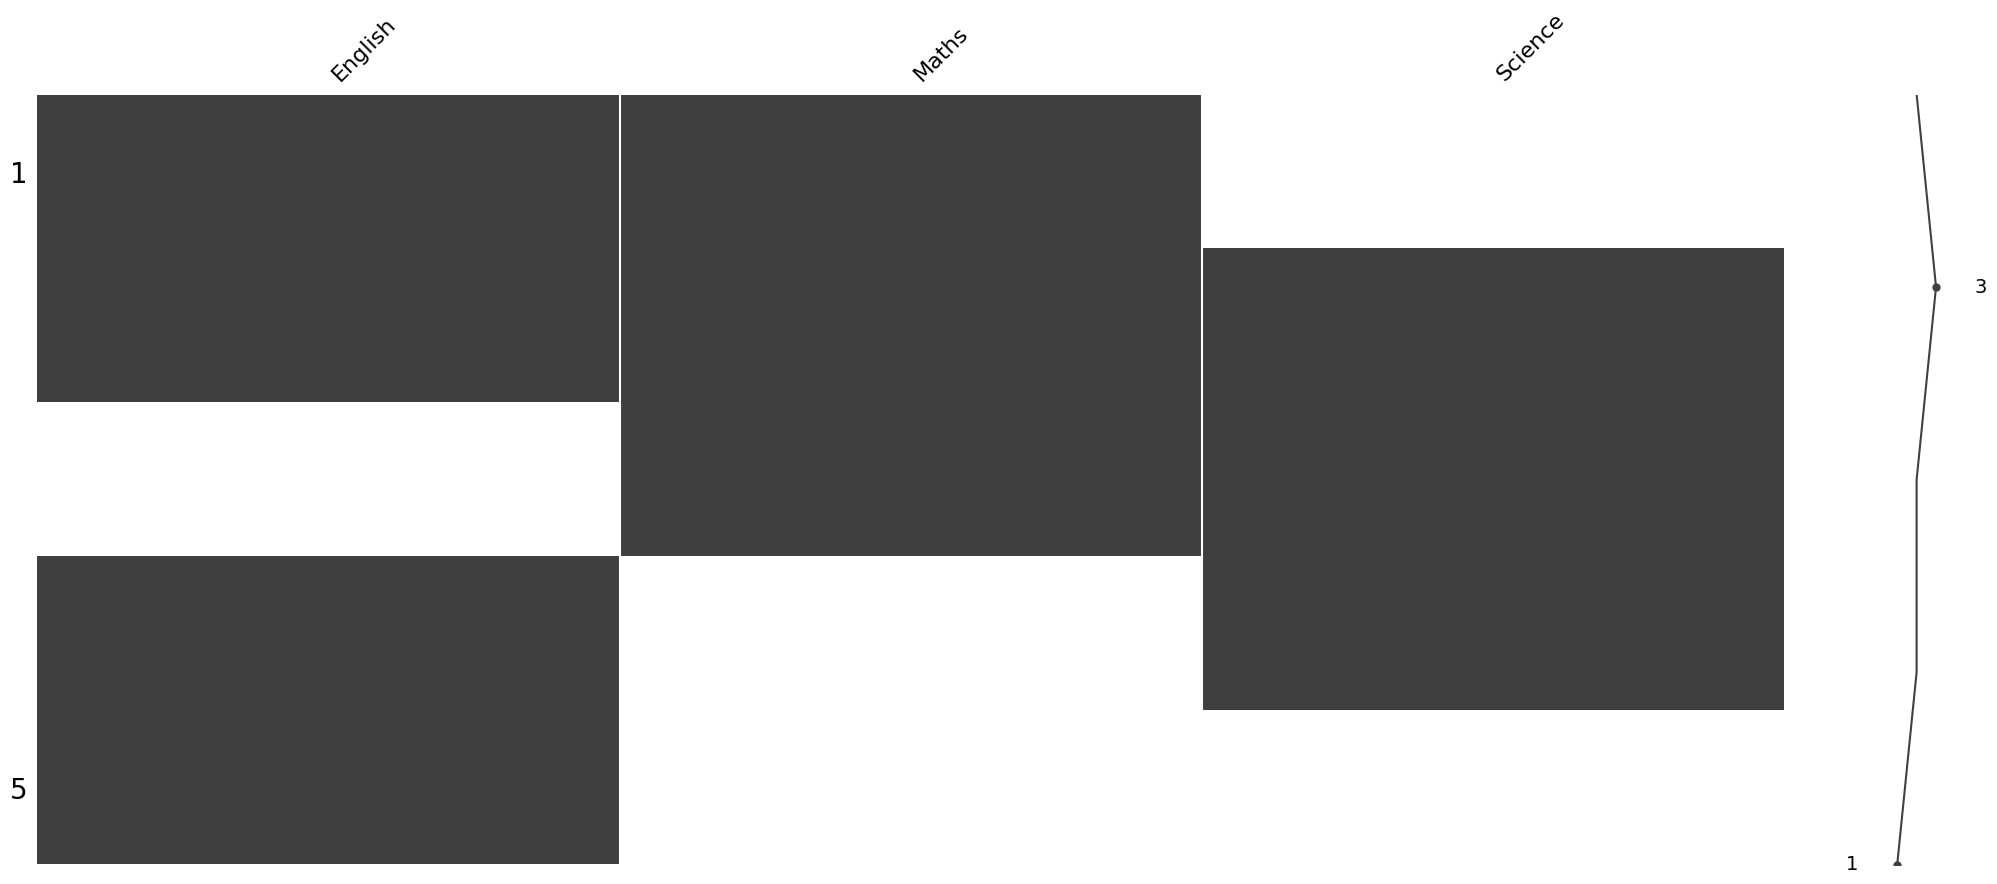

In [144]:
# Gives positional information of the missing values
msno.matrix(df)
#From the matrix plot, you can see where the missing values are located

<AxesSubplot: >

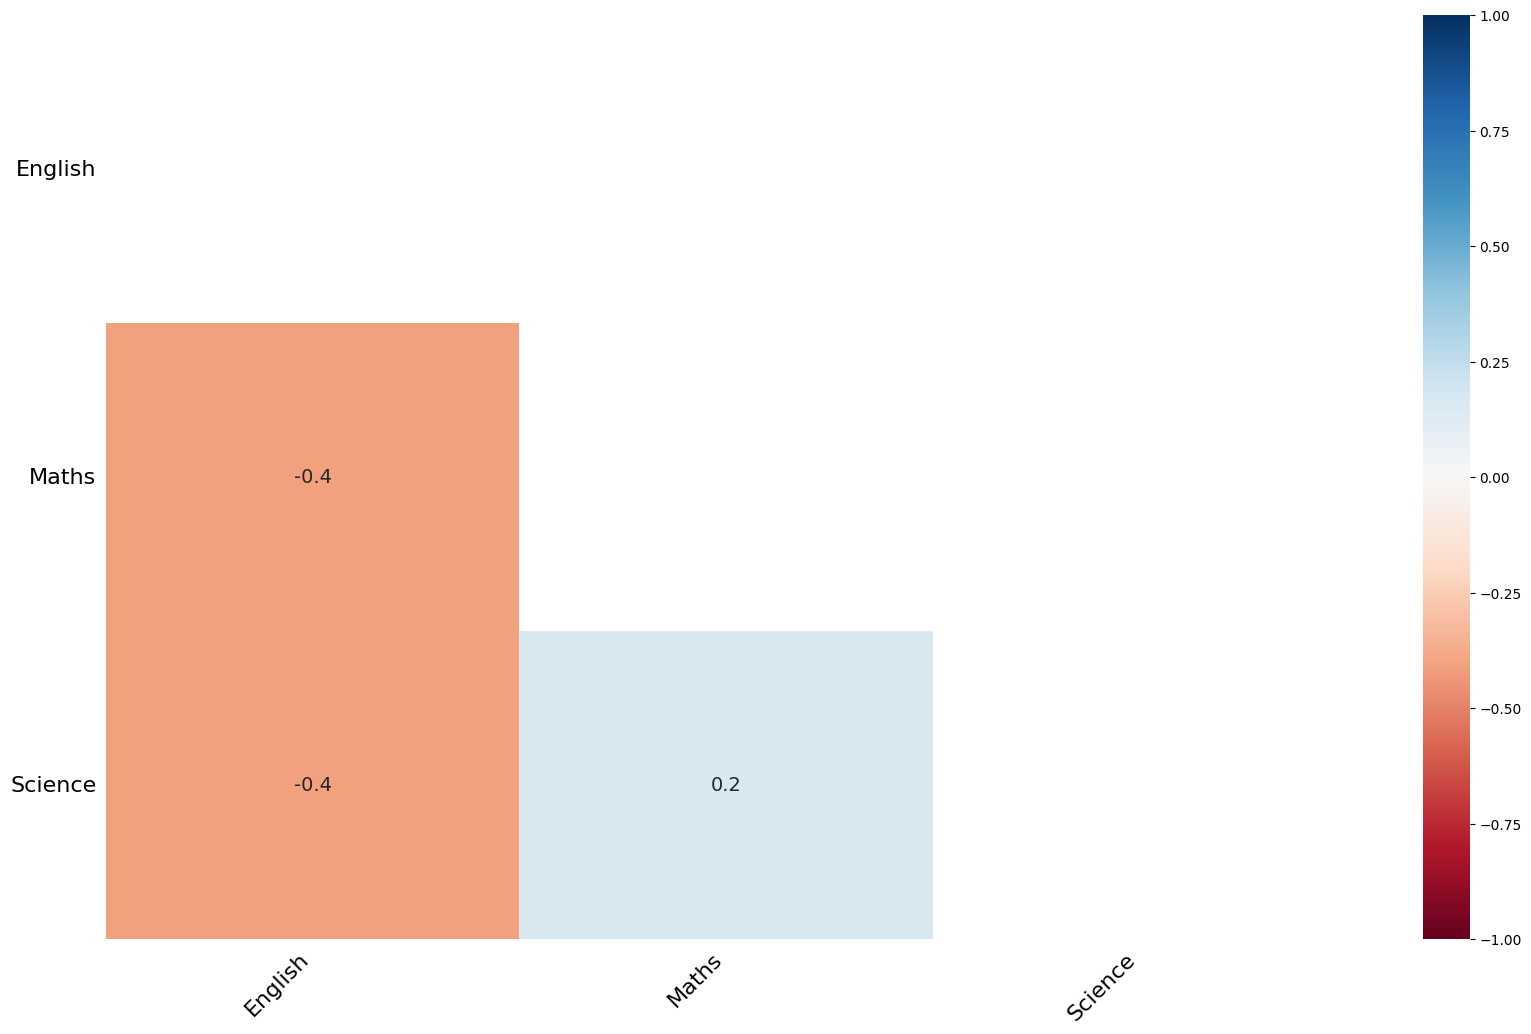

In [145]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)
#it can sometimes reveal interesting connections between missing values of different features.

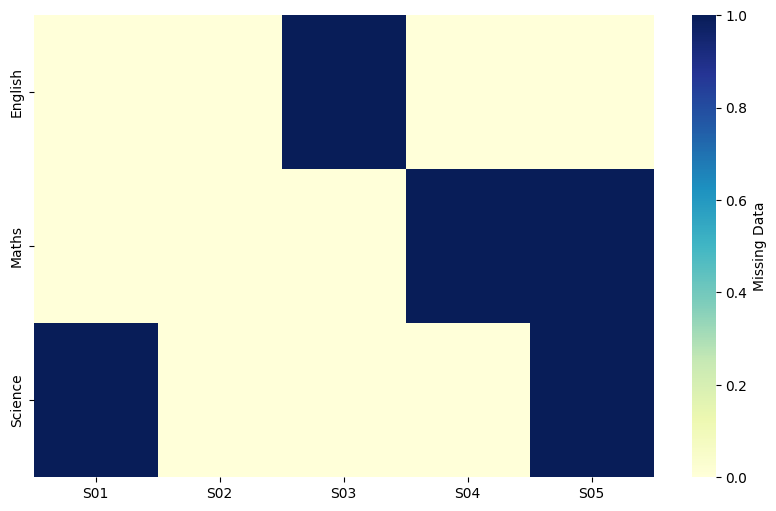

In [150]:

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show();
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

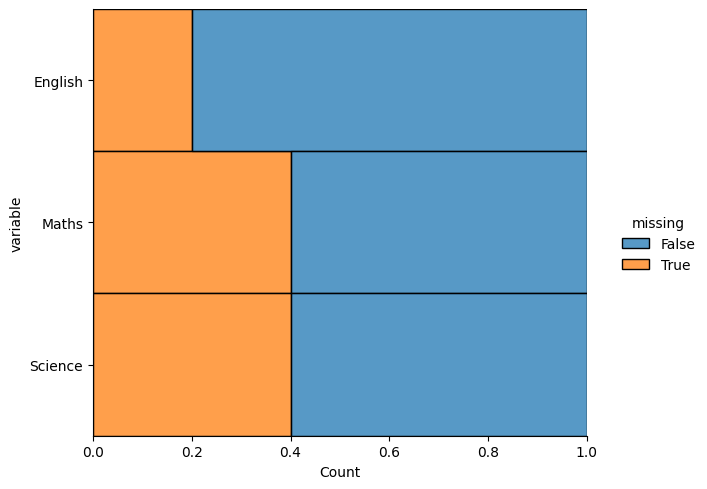

In [151]:
plt.figure(figsize=(10,6))
sns.displot( data=df.isna().melt(value_name="missing"),  y="variable",  hue="missing", multiple="fill",  aspect=1.25)
plt.show();

<AxesSubplot: >

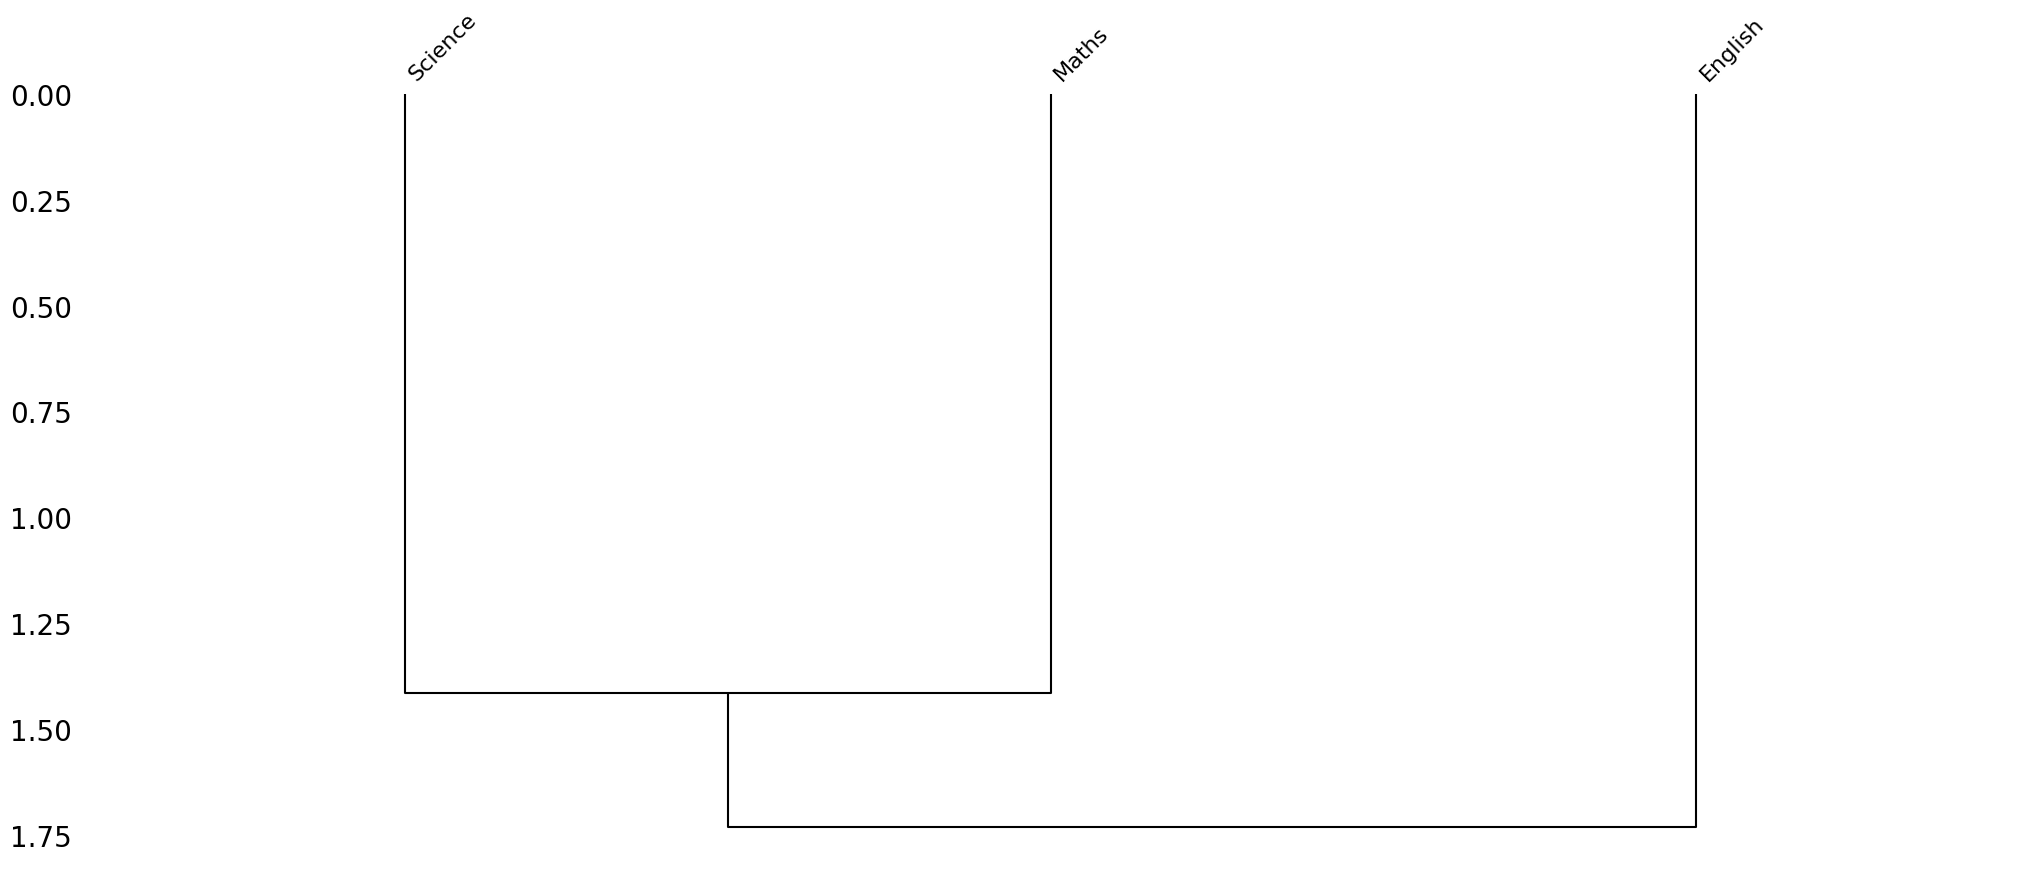

In [154]:
msno.dendrogram(df)